In [1]:
# A basic linear regression equation is - Y_pred = B0 + B1 * x
# Residual - Y_pred - Y_observed
#          (Predicted) (Actual)
# Mean Squared Errors - MSE - (Sum(((B0 + B1 * x) - Y_observed)^2))/m
# Minimum Mean Squared Errors - MinB0,B1(Sum(((B0 + B1 * x) - Y_observed)^2))/m
# Cost function - J(B0, B1) - 1/2 * (Sum(((B0 + B1 * x) - Y_observed)^2))/m
# Sum of squared errors - SSE - Unexplainable errors - Sum((Y_pred - Y_actual)^2)
# Sum of squared totals - TSS or SST - Total errors - Sum((Y_mean - Y_actual)^2)
# R^2 metric - 1 - (SSE/TSS) - How much error is explainable in the system - should increase

In [433]:
# Open the dataset and preprocess the values

import pandas as pd
import numpy as np

df = pd.read_csv('Data/Wine_Quality_Data.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


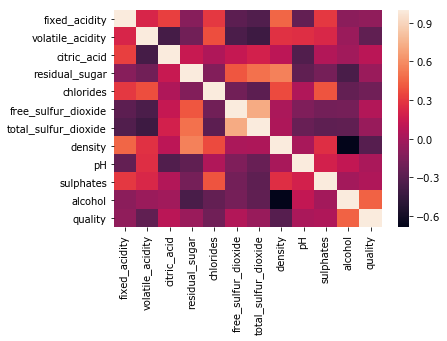

In [434]:
# Understanding the data correlations
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr())

In [435]:
# Understanding correlations
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [436]:
# Converting Categorical Data
df = dummyAndBind(df, 'color')
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [437]:
def dummyAndBind(df, attribute):
    dfvm = pd.get_dummies(df[attribute])
    df = pd.concat([df, dfvm], axis = 1)
    df = df.drop([attribute], axis = 1)
    return df

In [438]:
# Let's try to predict the alcohol levels of the given wine using it's other characteristics
# Splitting the X and the y variables
y = df['alcohol']
df = df.drop(['alcohol'],axis=1)

In [439]:
X = df

In [440]:
# Split the dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [441]:
lm = lm.fit(x_train, y_train)

In [442]:
y_pred = lm.predict(x_test)

In [443]:
# Looking at the R^2 value
from sklearn.metrics import r2_score

In [444]:
r2_score(y_test, y_pred)

0.8526147939475455

In [445]:
lm.coef_

array([ 5.16101894e-01,  7.97934821e-01,  5.19515291e-01,  2.27889282e-01,
       -1.07854993e+00, -4.51006133e-03, -1.71415114e-04, -6.47151384e+02,
        2.62012668e+00,  9.63391520e-01,  1.10875702e-01,  5.54843223e-01,
       -5.54843223e-01])

In [397]:
lm.intercept_

563.9875332262985